In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('DoS attacks-Hulk.csv')

In [7]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112642712,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
1,0,0,112642648,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
2,22,6,2567078,16,16,1096,2261.0,272,0,68.500000,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
3,22,6,962833,11,11,1235,1969.0,736,0,112.272727,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,0,0,112637985,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56300000.0,2181.424420,56300000.0,56300000.0,Benign


In [8]:
df.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559854 entries, 0 to 1559853
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1559854 non-null  int64  
 1   Protocol           1559854 non-null  int64  
 2   Flow Duration      1559854 non-null  int64  
 3   Tot Fwd Pkts       1559854 non-null  int64  
 4   Tot Bwd Pkts       1559854 non-null  int64  
 5   TotLen Fwd Pkts    1559854 non-null  int64  
 6   TotLen Bwd Pkts    1559854 non-null  float64
 7   Fwd Pkt Len Max    1559854 non-null  int64  
 8   Fwd Pkt Len Min    1559854 non-null  int64  
 9   Fwd Pkt Len Mean   1559854 non-null  float64
 10  Fwd Pkt Len Std    1559854 non-null  float64
 11  Bwd Pkt Len Max    1559854 non-null  int64  
 12  Bwd Pkt Len Min    1559854 non-null  int64  
 13  Bwd Pkt Len Mean   1559854 non-null  float64
 14  Bwd Pkt Len Std    1559854 non-null  float64
 15  Flow Byts/s        1559854 non-n

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dst Port,1559854.0,9.599639e+03,1.955101e+04,0.000000e+00,80.0,80.0,3389.0,6.553400e+04
Protocol,1559854.0,8.034167e+00,4.395545e+00,0.000000e+00,6.0,6.0,6.0,1.700000e+01
Flow Duration,1559854.0,1.005932e+07,2.979098e+07,-1.187300e+10,948.0,21945.0,2098224.5,1.200000e+08
Tot Fwd Pkts,1559854.0,4.867969e+00,5.039460e+01,1.000000e+00,2.0,2.0,5.0,1.781600e+04
Tot Bwd Pkts,1559854.0,5.236914e+00,1.572911e+02,0.000000e+00,0.0,1.0,3.0,6.789400e+04
...,...,...,...,...,...,...,...,...
Active Min,1559854.0,5.170630e+04,1.124452e+06,0.000000e+00,0.0,0.0,0.0,1.131706e+08
Idle Mean,1559854.0,4.018477e+06,1.562579e+07,0.000000e+00,0.0,0.0,0.0,1.200000e+08
Idle Std,1559854.0,1.019734e+05,1.399104e+06,0.000000e+00,0.0,0.0,0.0,7.493599e+07
Idle Max,1559854.0,4.105236e+06,1.580597e+07,0.000000e+00,0.0,0.0,0.0,1.200000e+08


In [11]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


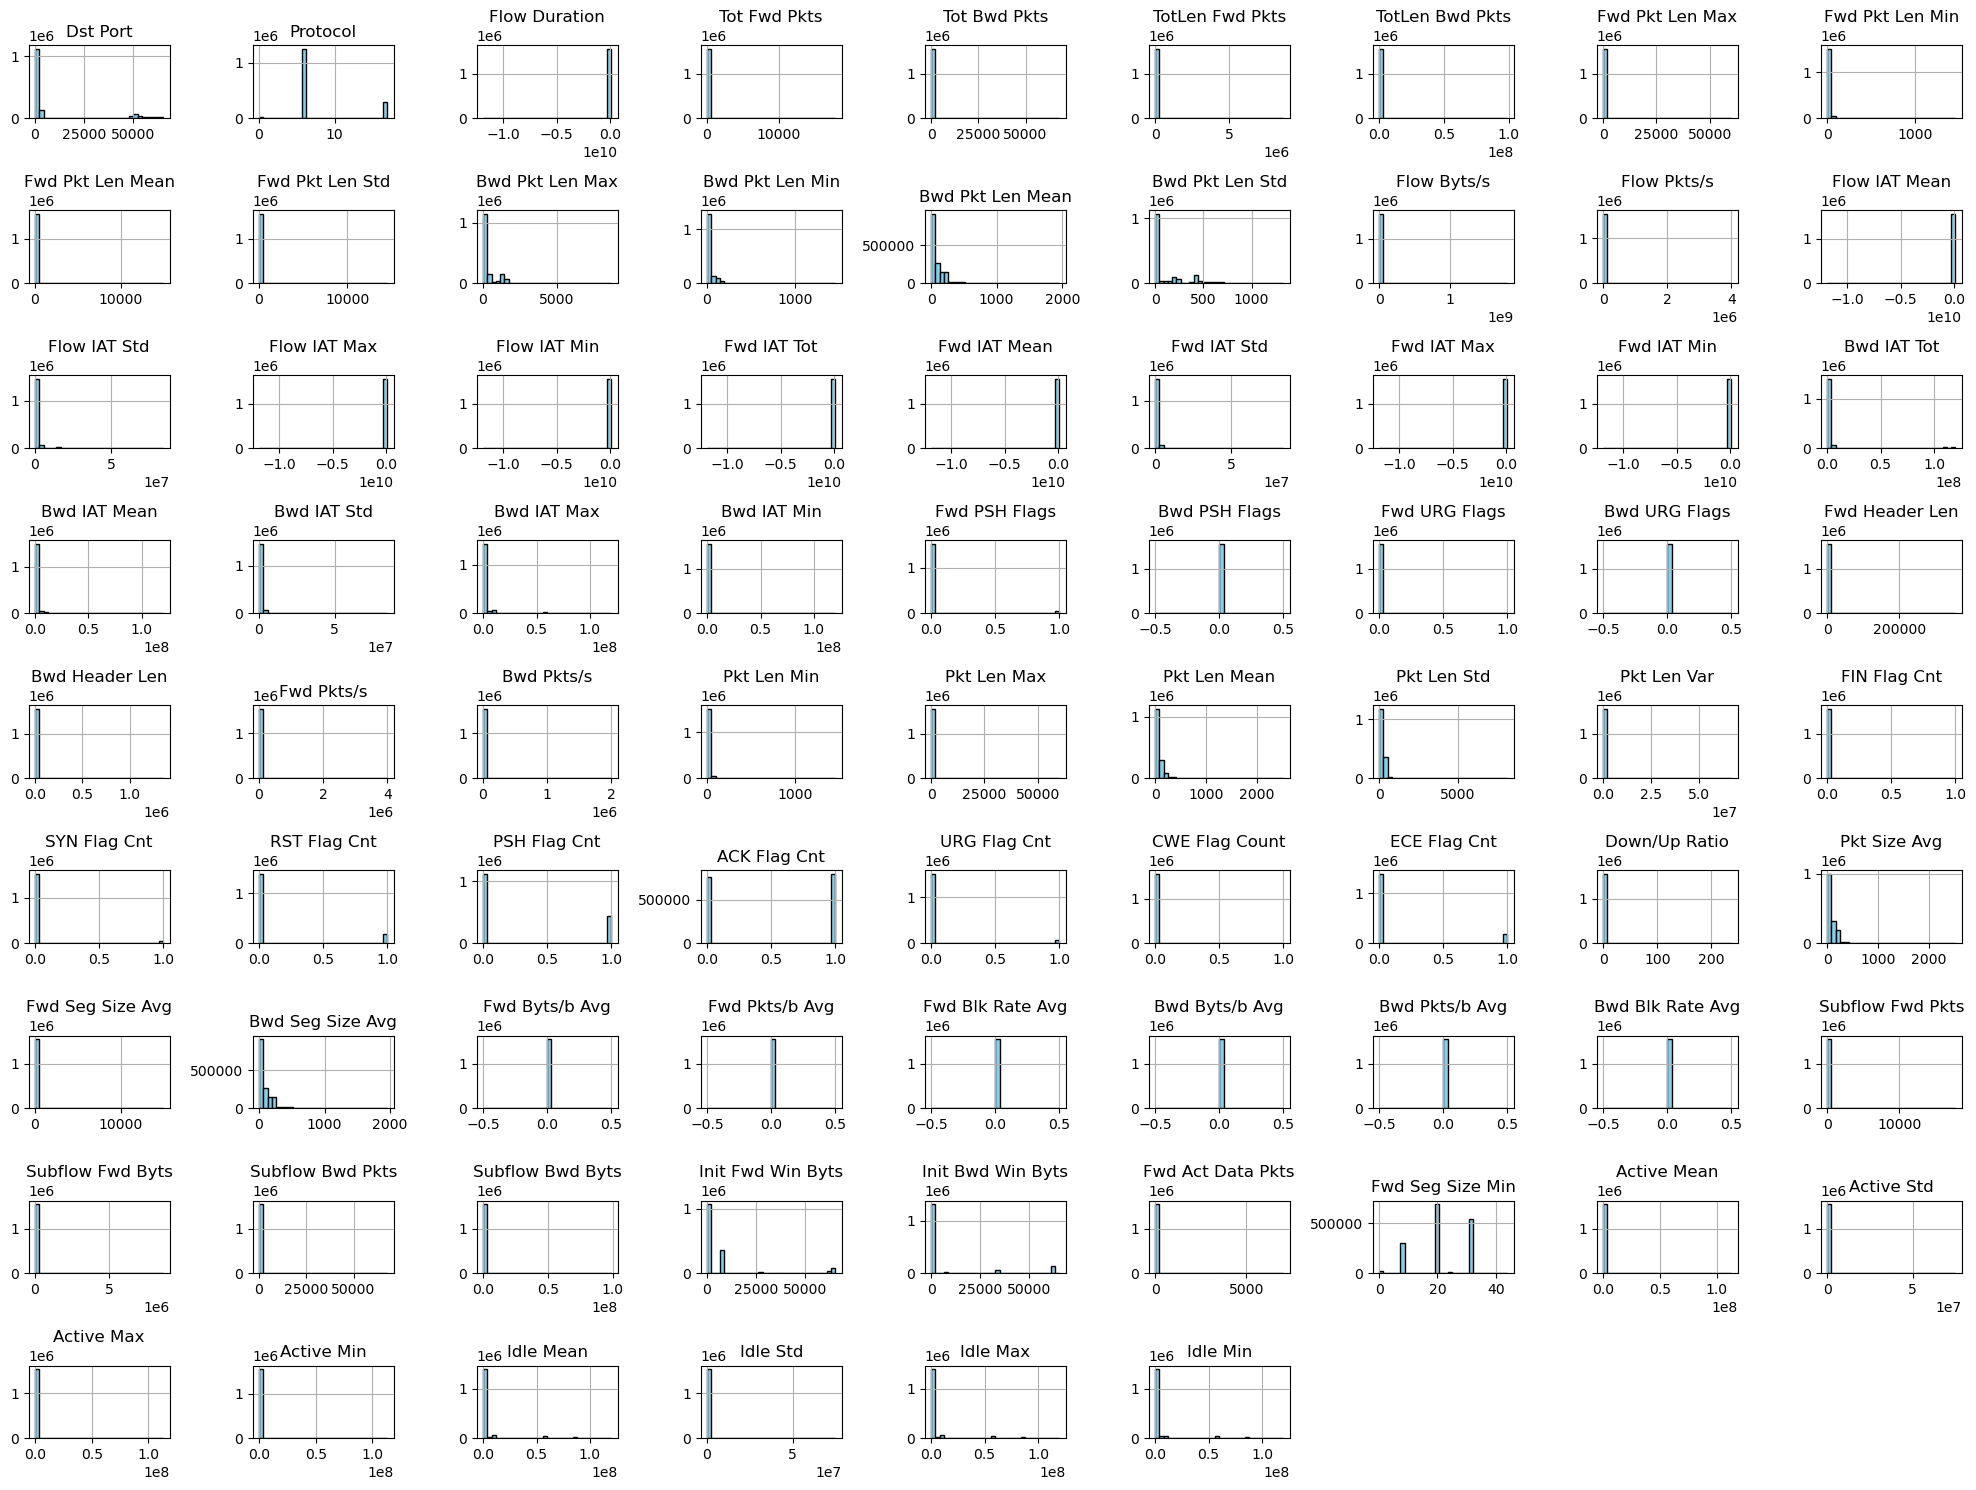

In [12]:
numeric_columns = df.select_dtypes(include=np.number).columns

# Histograms for all numeric columns
df[numeric_columns].hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

Label
Benign              1097942
DoS attacks-Hulk     461912
Name: count, dtype: int64


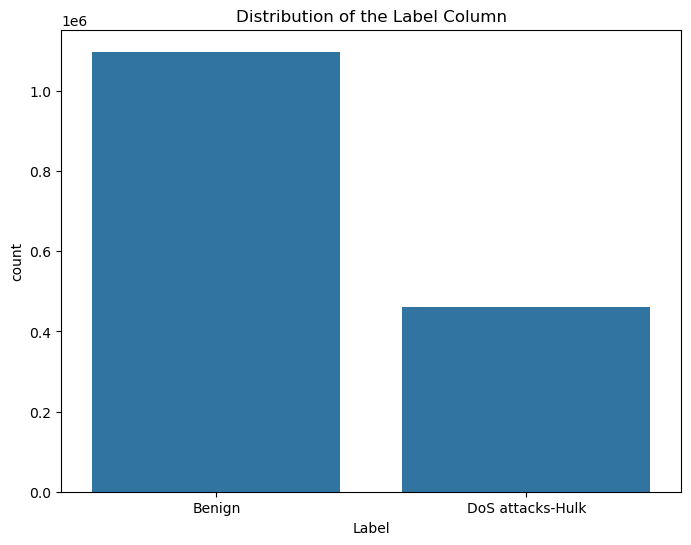

In [13]:
print(df['Label'].value_counts())

# Visualize the count of each class in the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of the Label Column')
plt.show()

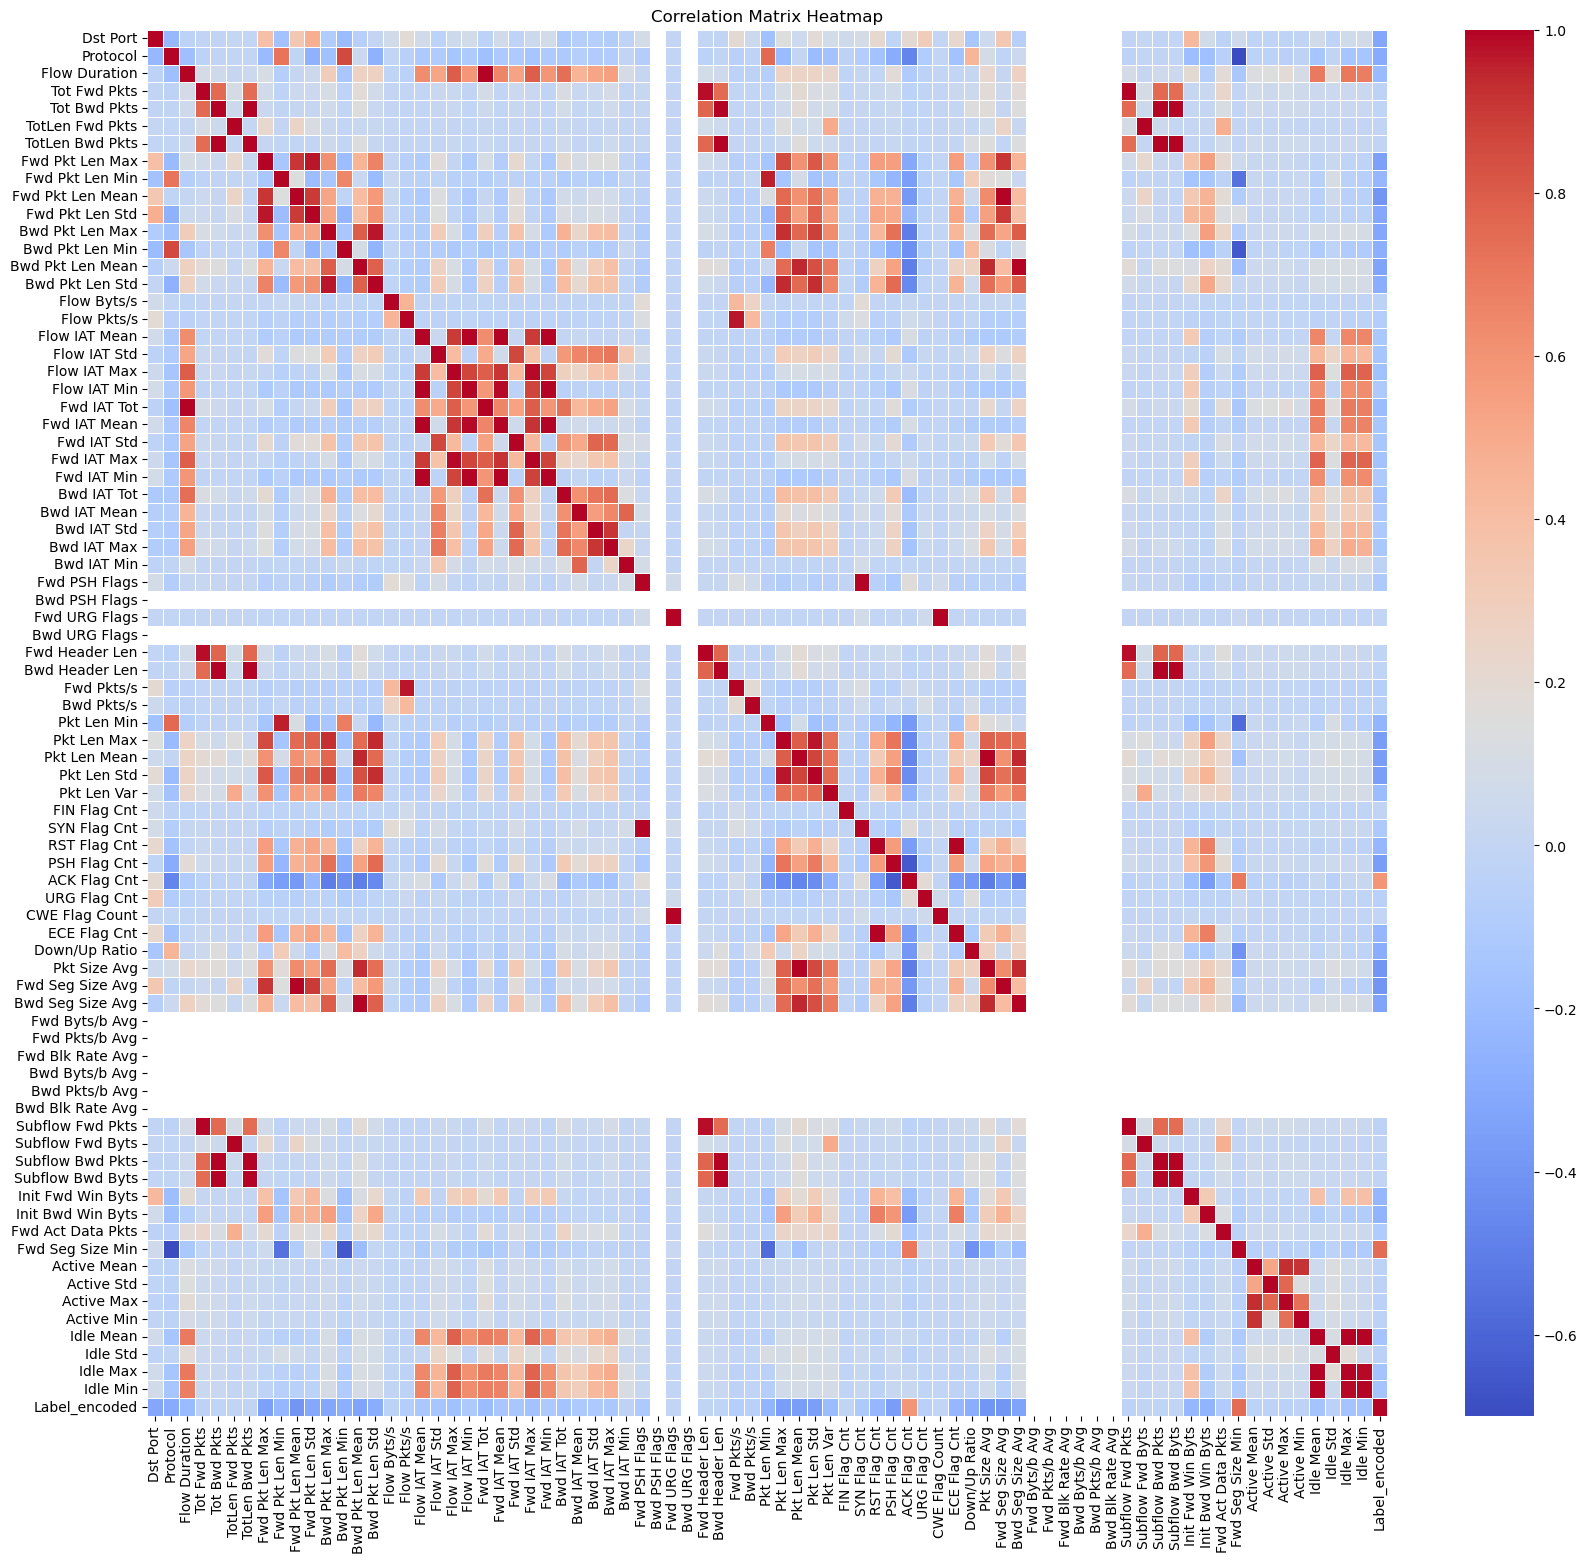

In [14]:
from sklearn.preprocessing import LabelEncoder
# Compute the correlation matrix
df1 = df.copy(deep=True)

# Encode the 'Label' column in df1
label_encoder = LabelEncoder()
df1['Label_encoded'] = label_encoder.fit_transform(df1['Label'])

# Drop non-numeric columns
df1_numeric = df1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df1_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [15]:
# Display the features most correlated with the encoded 'Label' column
correlation_with_label = correlation_matrix['Label_encoded'].sort_values(ascending=False)
print("Top 10 features most positively correlated with the Label:")
print(correlation_with_label.head(10))

Top 10 features most positively correlated with the Label:
Label_encoded       1.000000
Fwd Seg Size Min    0.746176
ACK Flag Cnt        0.592202
Fwd URG Flags      -0.008046
CWE Flag Count     -0.008046
Subflow Bwd Byts   -0.011913
TotLen Bwd Pkts    -0.011914
Subflow Fwd Byts   -0.012630
TotLen Fwd Pkts    -0.012630
FIN Flag Cnt       -0.015422
Name: Label_encoded, dtype: float64


In [16]:

print("\nTop 10 features most negatively correlated with the Label:")
print(correlation_with_label.tail(10))


Top 10 features most negatively correlated with the Label:
Fwd Seg Size Avg   -0.395637
Pkt Size Avg       -0.395862
Bwd PSH Flags            NaN
Bwd URG Flags            NaN
Fwd Byts/b Avg           NaN
Fwd Pkts/b Avg           NaN
Fwd Blk Rate Avg         NaN
Bwd Byts/b Avg           NaN
Bwd Pkts/b Avg           NaN
Bwd Blk Rate Avg         NaN
Name: Label_encoded, dtype: float64


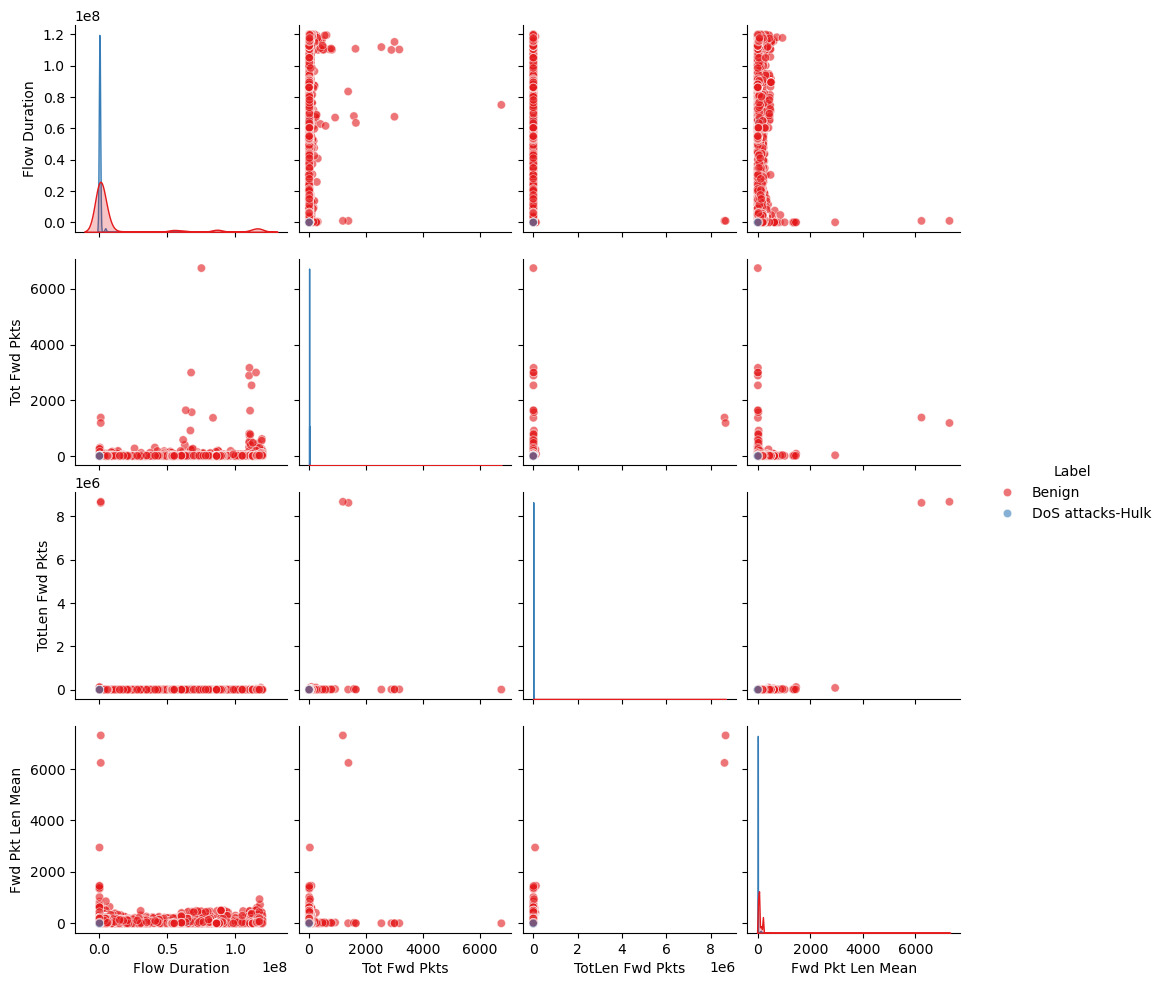

In [17]:
# Sample data to avoid heavy computation
sample_df = df.sample(frac=0.05, random_state=42)

# Select a few features to visualize relationships
selected_features = ['Flow Duration', 'Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Mean', 'Label']

# Plot pairplot
sns.pairplot(sample_df[selected_features], hue='Label', palette='Set1', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()


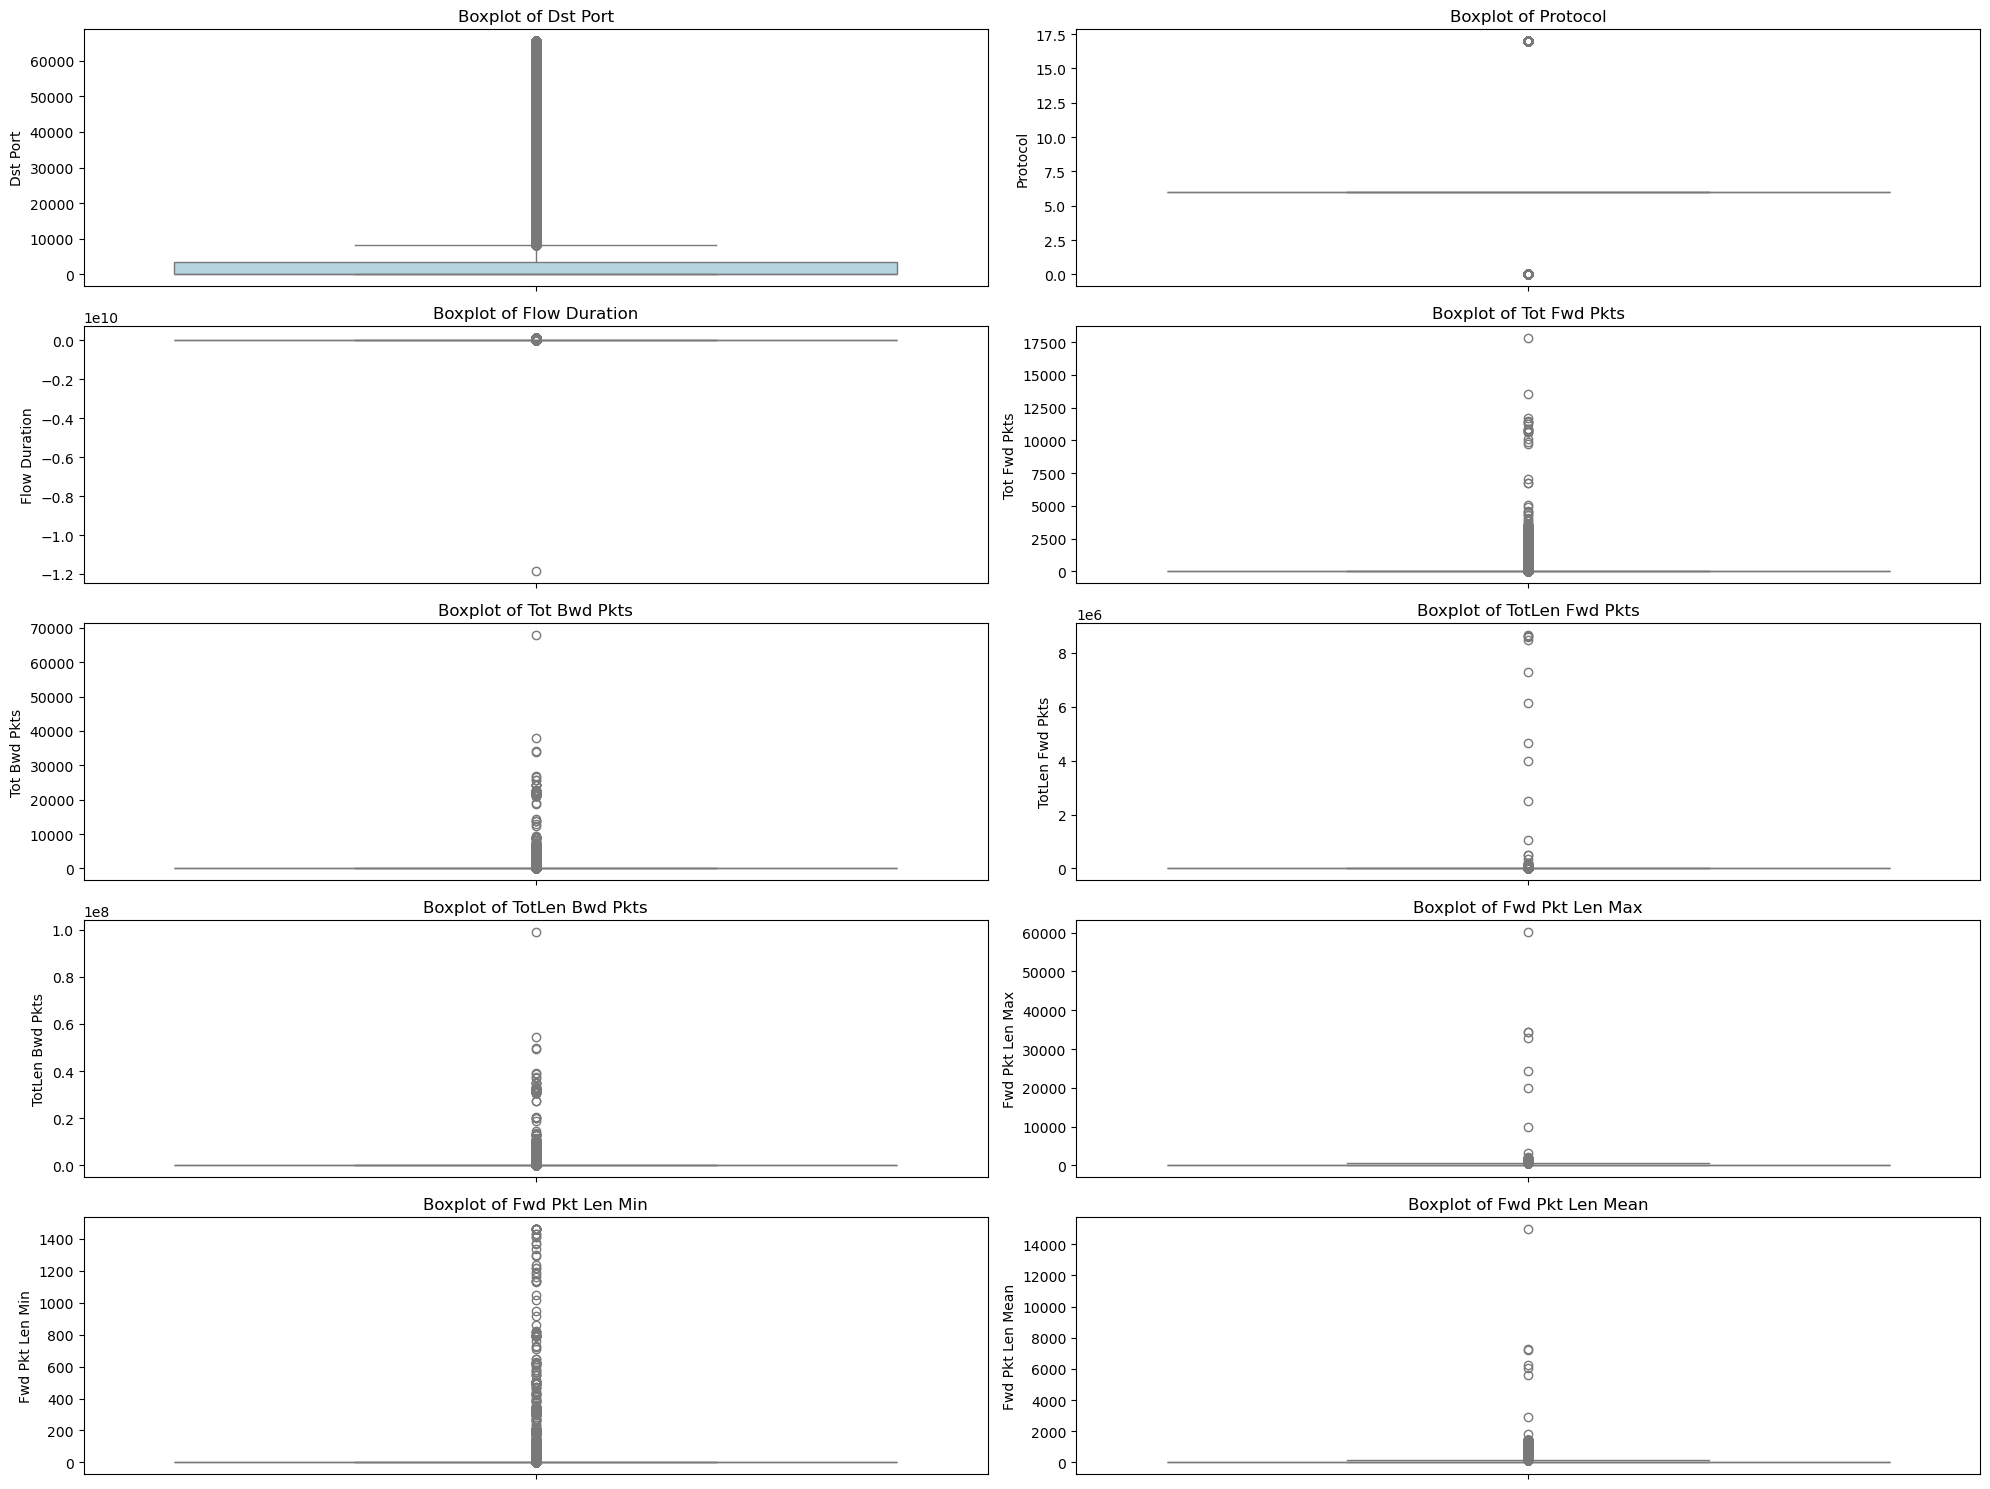

In [18]:
# Plot boxplots to detect outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns[:10], 1):  # Visualize only the first 10 numeric columns
    plt.subplot(5, 2, i)
    sns.boxplot(y=column, data=df, color='lightblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [19]:
# Get categorical columns (excluding 'Label')
categorical_columns = df.select_dtypes(include='object').columns.drop('Label')

# Visualize count plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Count plot of {column}')
    plt.show()


# Feature Extraction

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

In [7]:
# Encode target variable if it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for LDA and autoencoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest for feature extraction

Top 25 important features:
Init Fwd Win Byts: 0.08579386856038368
Dst Port: 0.08153531816346735
Fwd Seg Size Avg: 0.07050067840829209
Fwd Pkt Len Mean: 0.05376433226595597
Bwd Pkts/s: 0.04581378230486108
TotLen Fwd Pkts: 0.04288966831123092
Subflow Fwd Byts: 0.03758352306038479
Flow Byts/s: 0.03582603506415636
Fwd IAT Min: 0.03487990596626376
Pkt Len Mean: 0.0342563222348563
Flow IAT Std: 0.02639596854272943
Flow Duration: 0.02541106390650781
Flow IAT Max: 0.024024563236410435
Flow IAT Mean: 0.023461723649094993
Pkt Size Avg: 0.023343836617309176
Fwd Pkts/s: 0.0187162845468939
Fwd Pkt Len Max: 0.017475843385261418
Fwd IAT Tot: 0.01742048863082722
Subflow Bwd Pkts: 0.016328269814462542
Fwd IAT Mean: 0.016279311687611597
Flow Pkts/s: 0.01606344669540943
Fwd IAT Max: 0.015089819113184246
ECE Flag Cnt: 0.01323324186025787
Fwd Header Len: 0.011702423735858804
Pkt Len Max: 0.01165723737036804


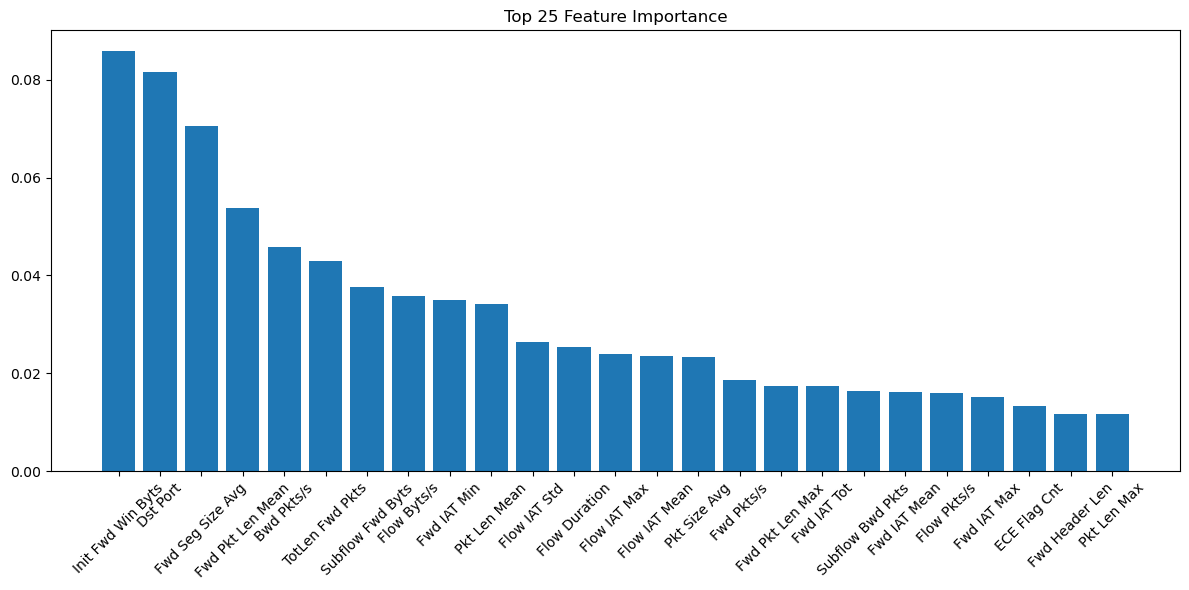

In [9]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 25 important features
print("Top 25 important features:")
for i in range(25):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

# Plot feature importances for the top 25 features
plt.figure(figsize=(12, 6))
plt.title("Top 25 Feature Importance")
plt.bar(range(25), importances[indices[:25]], align='center')  # Adjusted to 25
plt.xticks(range(25), X.columns[indices[:25]], rotation=45)  # Adjusted to 25
plt.tight_layout()
plt.show()


## Recursive Feature Elimination (RFE)

In [10]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder

# # Example data preprocessing
# # Check if there are categorical variables and encode them
# for col in X_train.columns:
#     if X_train[col].dtype == 'object':
#         le = LabelEncoder()
#         X_train[col] = le.fit_transform(X_train[col])
#         X_test[col] = le.transform(X_test[col])

# # RFE with Random Forest as the estimator
# rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), n_features_to_select=25)
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features = X_train.columns[rfe.support_]
# print("Selected features by RFE:")
# print(selected_features)

# # Create a DataFrame to visualize feature rankings
# feature_ranking = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Rank': rfe.ranking_
# })

# # Sort the features based on their rank
# feature_ranking = feature_ranking.sort_values(by='Rank')

# # Plot the top features
# plt.figure(figsize=(12, 6))
# plt.barh(feature_ranking['Feature'], feature_ranking['Rank'], color='skyblue')
# plt.title("Feature Rankings from RFE with Random Forest")
# plt.xlabel("Rank")
# plt.ylabel("Features")
# plt.gca().invert_yaxis()  # Invert y-axis to have the highest rank at the top
# plt.tight_layout()
# plt.show()

# Autoencoder

2024-10-24 20:27:18.420278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 20:27:18.439916: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 20:27:18.445815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 20:27:18.460267: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 20:27:19.738467: W tensorflow/compiler/tf2

Epoch 1/50


I0000 00:00:1729781842.327607   20099 service.cc:146] XLA service 0x794a38007f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729781842.327636   20099 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-10-24 20:27:22.349342: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-24 20:27:22.450714: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 3/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0304

I0000 00:00:1729781844.628966   20099 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - loss: 1.1026 - val_loss: 1.1157
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1070 - val_loss: 1.0831
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0803 - val_loss: 1.0466
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0380 - val_loss: 1.0033
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9199 - val_loss: 0.9531
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9245 - val_loss: 0.9002
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8681 - val_loss: 0.8489
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8490 - val_loss: 0.8030
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7602 - val_loss: 0.7646
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7252 - val_loss: 0.7336
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6797 - val_loss: 0.7089
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7294 - val_loss: 0.688

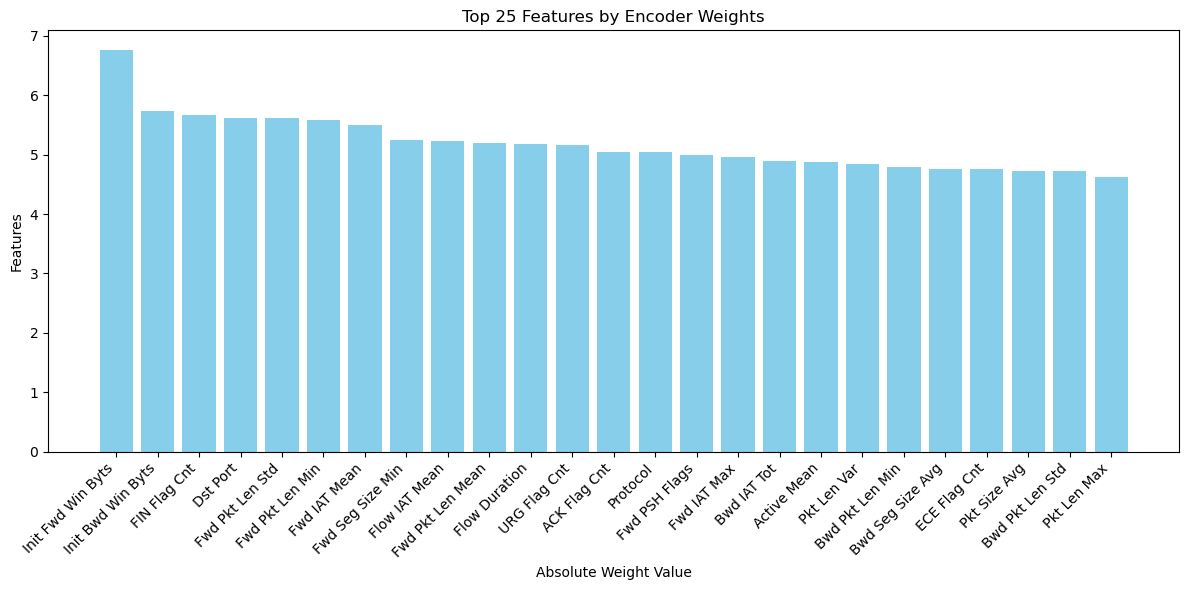

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Encoded features shape: (1658, 20)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_scaled is already defined
input_dim = X_train_scaled.shape[1]
encoding_dim = 20  # Adjust this as needed

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with fewer epochs and early stopping
autoencoder.fit(X_train_scaled, X_train_scaled, 
                epochs=50,              # You can reduce this further for testing
                batch_size=128,         # Adjusted batch size for potentially faster training
                validation_split=0.2, 
                callbacks=[early_stopping],  # Use early stopping
                verbose=1)

# Extract the encoder part
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Get the weights of the encoder layer
encoder_weights = autoencoder.get_weights()[0]
# Access weights directly from the encoder layer

# Create a DataFrame for feature importance based on weights
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': np.abs(encoder_weights).sum(axis=1)  # Sum of absolute weights for each feature
})

# Sort features by absolute weight
feature_importance = feature_importance.sort_values(by='Weight', ascending=False)

# Select top 25 features
top_features = feature_importance.head(25)

# Print top 25 features
print("Top 25 features by encoder weights:")
print(top_features[['Feature', 'Weight']])

# Plot the top features
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Weight'], color='skyblue')
plt.title("Top 25 Features by Encoder Weights")
plt.xlabel("Absolute Weight Value")
plt.ylabel("Features")
plt.xticks(rotation=45, ha='right')   # Invert y-axis to have the highest on top
plt.tight_layout()
plt.show()

# Transform the features
X_train_encoded = encoder_model.predict(X_train_scaled)
X_test_encoded = encoder_model.predict(X_test_scaled)

print(f"Encoded features shape: {X_train_encoded.shape}")


# Linear Discriminant Analysis (LDA)

LDA transformed feature shape: (1658, 1)
Top 25 features by LDA coefficients:
             Feature  Coefficient
35    Fwd Header Len    29.408249
36    Bwd Header Len   -24.557743
62  Subflow Fwd Pkts   -18.363065
3       Tot Fwd Pkts   -18.363065
25       Fwd IAT Min    17.475438
76          Idle Max    15.884626
24       Fwd IAT Max   -14.671898
22      Fwd IAT Mean   -14.362963
73        Active Min    13.916798
20      Flow IAT Min    13.908721
17     Flow IAT Mean   -13.697813
64  Subflow Bwd Pkts    12.969674
4       Tot Bwd Pkts    12.969674
39       Pkt Len Min    11.291088
2      Flow Duration    10.761023
53      Pkt Size Avg   -10.329350
10   Fwd Pkt Len Std    10.089527
23       Fwd IAT Std     9.990494
70       Active Mean    -9.407780
74         Idle Mean    -8.780502
48      ACK Flag Cnt     7.421273
11   Bwd Pkt Len Max     6.661194
40       Pkt Len Max    -6.588284
21       Fwd IAT Tot    -6.353066
41      Pkt Len Mean     5.258957


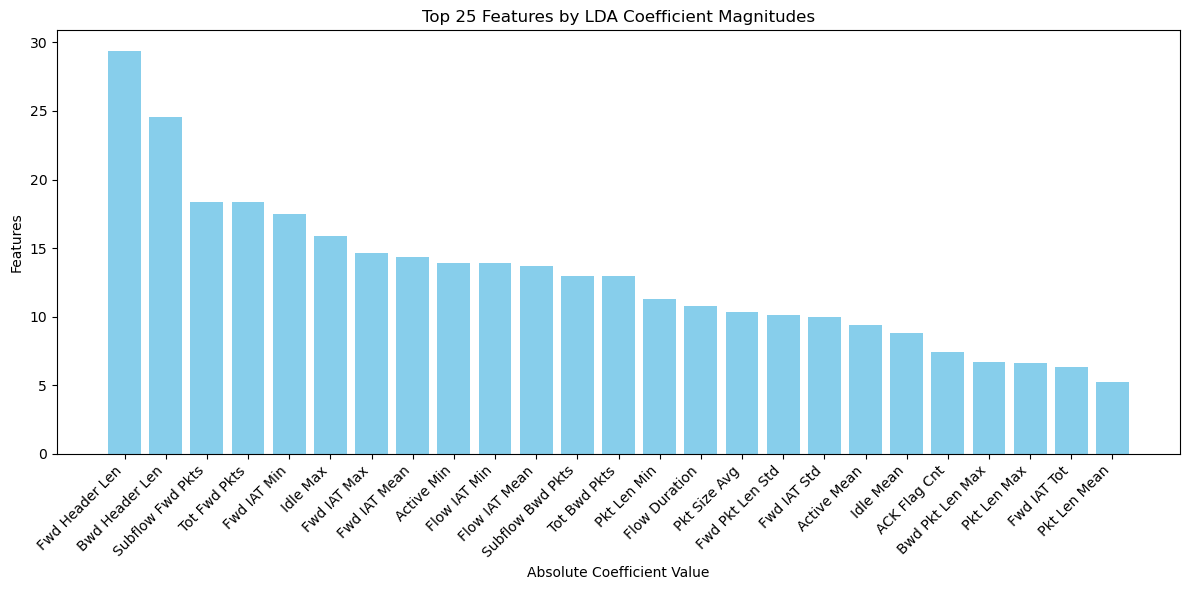

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA to reduce dimensions
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)

# Print the transformed feature shape
print(f"LDA transformed feature shape: {X_train_lda.shape}")

# Get the LDA coefficients
lda_coefficients = lda.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lda_coefficients
})

# Sort features by absolute value of coefficients
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 25 features
top_features = feature_importance.head(25)

# Print top 25 features
print("Top 25 features by LDA coefficients:")
print(top_features[['Feature', 'Coefficient']])

# Plot the top features
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Abs_Coefficient'], color='skyblue')
plt.title("Top 25 Features by LDA Coefficient Magnitudes")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()
